In [1]:
#import packages
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
tata = pd.read_csv(r"C:\Users\Admin\Downloads\TATASTEEL.NS.csv")

In [3]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [4]:
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
1,2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2,2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
3,2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
4,2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740


In [5]:
tata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2023-10-23,123.349998,123.400002,119.699997,120.000000,120.000000,30699479
1231,2023-10-25,121.199997,122.800003,120.750000,121.349998,121.349998,27346103
1232,2023-10-26,120.849998,120.900002,118.900002,119.900002,119.900002,36298907
1233,2023-10-27,120.500000,121.800003,119.500000,119.900002,119.900002,28424007
1234,2023-10-30,121.050003,121.250000,118.949997,119.150002,119.150002,18753217


In [6]:
tata.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1235.0,8.188623e+01,3.689123e+01,26.225000,4.647500e+01,8.852000e+01,1.139425e+02,1.519400e+02
High,1235.0,8.302787e+01,3.724750e+01,26.795000,4.719000e+01,9.065500e+01,1.157600e+02,1.534500e+02
Low,1235.0,8.059485e+01,3.638931e+01,25.084999,4.568750e+01,8.750500e+01,1.122500e+02,1.491750e+02
Close,1235.0,8.176018e+01,3.678373e+01,25.375000,4.647000e+01,8.880500e+01,1.140000e+02,1.519400e+02
Adj Close,1235.0,7.587922e+01,3.622229e+01,22.228422,4.008031e+01,8.396455e+01,1.077347e+02,1.396047e+02
Volume,1235.0,1.104945e+08,8.032488e+07,0.000000,5.343832e+07,9.146835e+07,1.426162e+08,6.428460e+08


# Model

In [7]:
#Creat a model
model = AutoReg(tata['High'], lags=20)

In [8]:
#fit the model
result = model.fit()

# Prediction

In [15]:
# Define the number of periods you want to forecast
forecast_periods = 5  # Adjust as needed

# Use the model's predict method with the parameters
forecast = result.predict(start=len(tata)-10, end=len(tata)-1)


In [16]:
forecast

1225    125.125906
1226    127.593136
1227    128.706090
1228    128.421071
1229    126.084136
1230    125.483559
1231    123.056409
1232    122.514499
1233    120.724841
1234    122.182162
dtype: float64

# Plot

In [19]:
x = tata['Date'][-10:]
y1 = tata['High'][-10:]
y2 = forecast

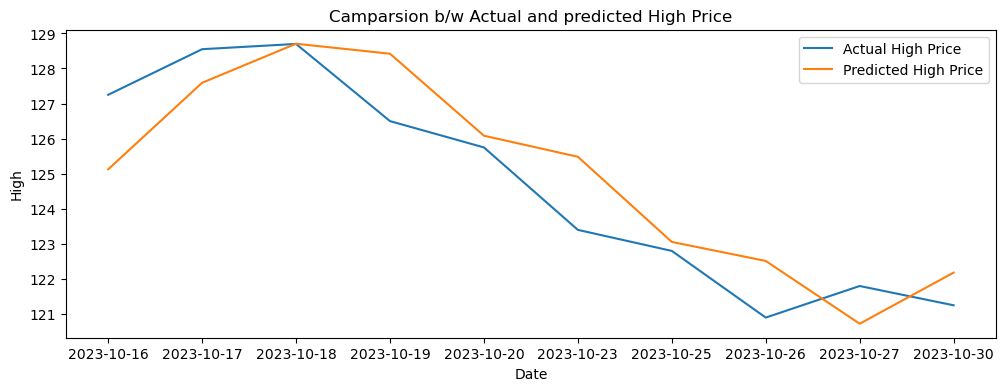

In [25]:
plt.figure(figsize=(12,4))
plt.plot(x,y1, label = 'Actual High Price')
plt.plot(x,forecast,label= 'Predicted High Price')
plt.title('Camparsion b/w Actual and predicted High Price')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.show()